In [70]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [71]:
df = pd.read_csv('./Data/GBIMEfinal.csv')
df

,Unnamed: 0,t,c,o,h,l,v
0,0,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
1,1,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2,2,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
3,3,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
4,4,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...,...
1992,1992,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
1993,1993,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
1994,1994,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202
1995,1995,2023-05-10 14:59:40,183.200000,185.000000,185.000000,182.200000,30993


In [72]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [73]:
df.shape

(1997, 6)

In [74]:
df.set_index(pd.to_datetime(df['t']), inplace=True)
df

,t,c,o,h,l,v
t,,,,,,
2012-09-09 14:59:59,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
2012-09-10 14:59:59,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2012-09-11 14:59:59,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
2012-09-12 14:59:59,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
2012-09-13 14:59:59,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
2023-05-07 14:59:40,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
2023-05-08 14:59:40,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
2023-05-09 14:59:40,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202


In [75]:
df.drop('t',axis=1,inplace=True)
df

,t,c,o,h,l,v
t,,,,,,
2012-09-09 14:59:59,2012-09-09 14:59:59,46.052427,46.052427,46.052427,42.894547,50
2012-09-10 14:59:59,2012-09-10 14:59:59,50.526092,46.052427,50.526092,46.841898,254
2012-09-11 14:59:59,2012-09-11 14:59:59,55.526070,50.526092,55.526070,51.315562,376
2012-09-12 14:59:59,2012-09-12 14:59:59,61.052361,55.526070,61.052361,56.578697,1131
2012-09-13 14:59:59,2012-09-13 14:59:59,67.104966,61.052361,67.104966,62.104988,27430
...,...,...,...,...,...,...
2023-05-07 14:59:40,2023-05-07 14:59:40,183.000000,187.000000,187.000000,183.000000,49157
2023-05-08 14:59:40,2023-05-08 14:59:40,181.500000,186.000000,186.000000,180.200000,70629
2023-05-09 14:59:40,2023-05-09 14:59:40,183.200000,184.900000,184.900000,180.400000,59202


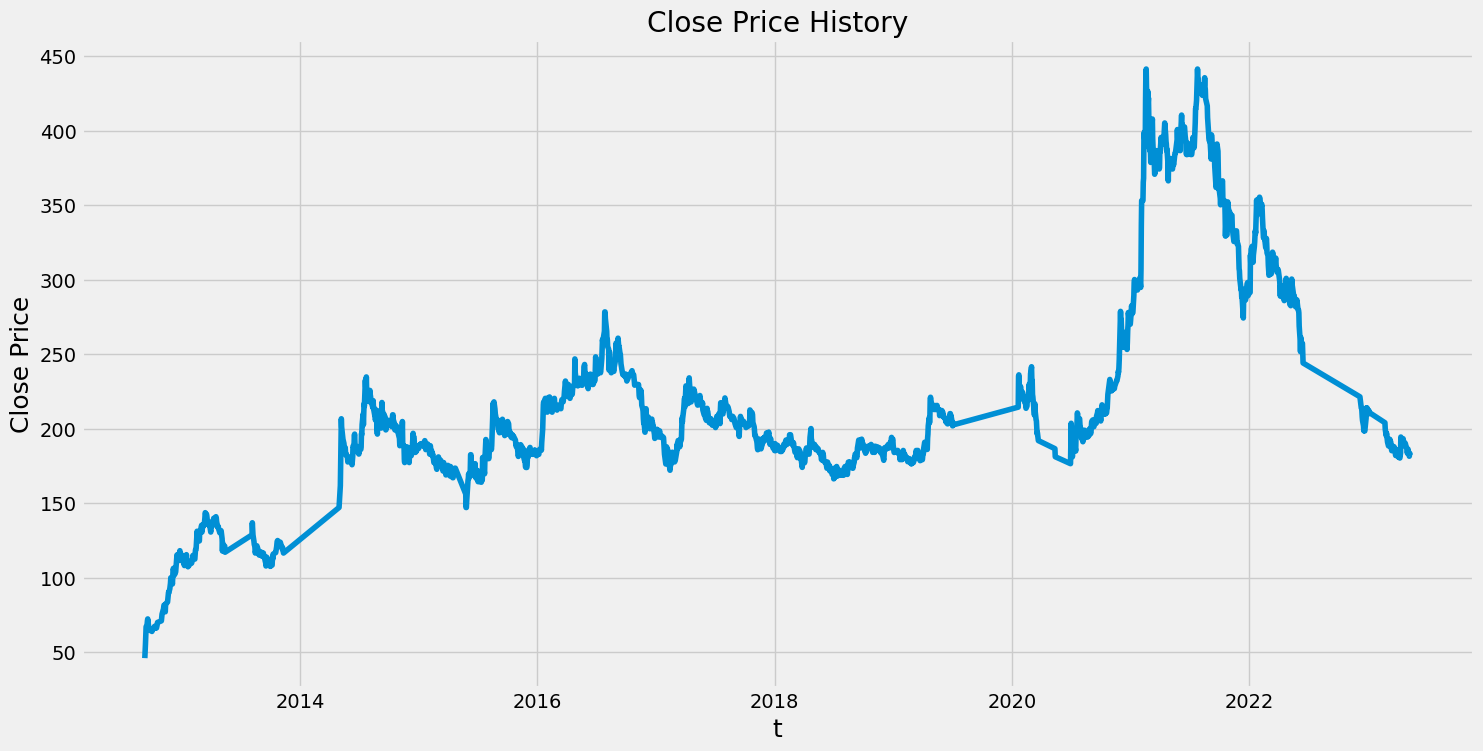

In [76]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['c'])
plt.xlabel('t',fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [77]:
ma100 = df.c.rolling(100).mean()
ma100

t
2012-09-09 14:59:59           NaN
2012-09-10 14:59:59           NaN
2012-09-11 14:59:59           NaN
2012-09-12 14:59:59           NaN
2012-09-13 14:59:59           NaN
                          ...    
2023-05-07 14:59:40    219.243437
2023-05-08 14:59:40    218.165233
2023-05-09 14:59:40    217.126359
2023-05-10 14:59:40    216.123408
2023-05-11 14:59:40    215.121165
Name: c, Length: 1997, dtype: float64

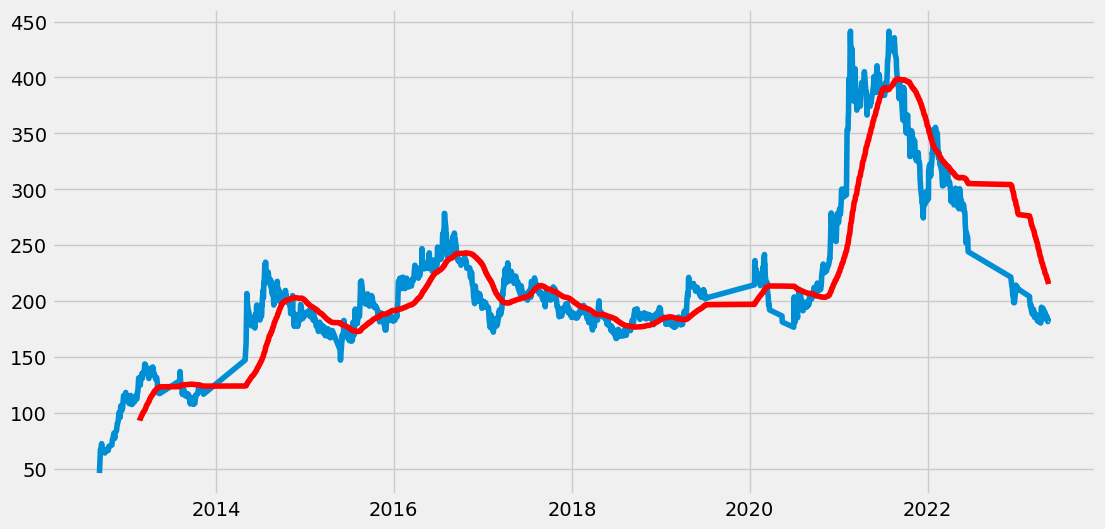

In [78]:
plt.figure(figsize=(12,6))
plt.plot(df.c)
plt.plot(ma100,'r')

In [79]:
ma200 = df.c.rolling(200).mean()
ma200

t
2012-09-09 14:59:59           NaN
2012-09-10 14:59:59           NaN
2012-09-11 14:59:59           NaN
2012-09-12 14:59:59           NaN
2012-09-13 14:59:59           NaN
                          ...    
2023-05-07 14:59:40    265.163466
2023-05-08 14:59:40    264.498636
2023-05-09 14:59:40    263.878228
2023-05-10 14:59:40    263.264617
2023-05-11 14:59:40    262.671262
Name: c, Length: 1997, dtype: float64

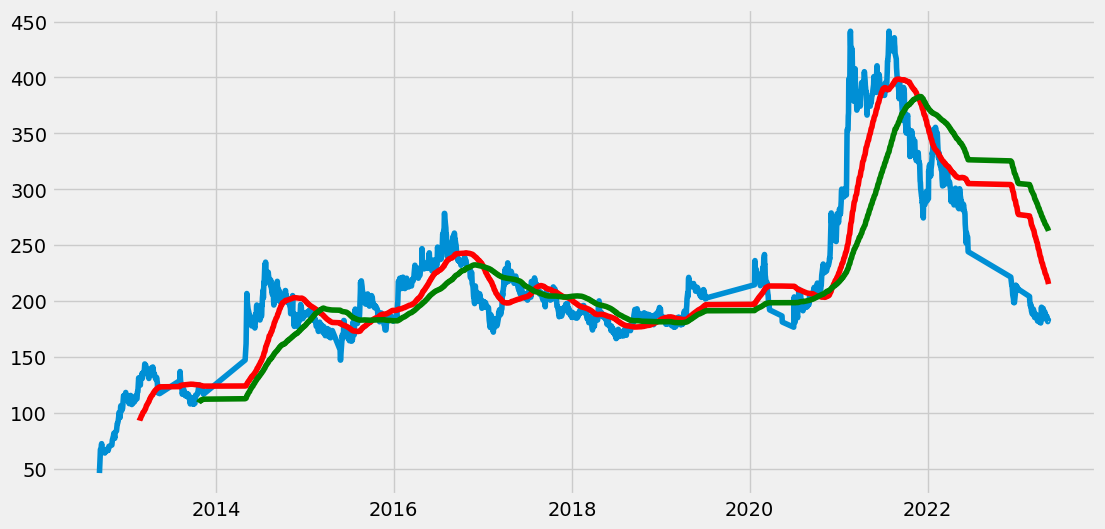

In [80]:
plt.figure(figsize=(12,6))
plt.plot(df.c)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [81]:
#dataframe with only close price
data = df.filter(['c'])

#convert the df to a numpy array
dataset = data.values

# get the number of rows to train the model on

training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1598

In [82]:
dataset.shape

(1997, 1)

In [83]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.01131846],
       [0.0239685 ],
       ...,
       [0.34698606],
       [0.34698606],
       [0.34470904]])

In [84]:
#training the dataset
train_data = scaled_data[0:training_data_len,:]

#split the data into x_train and y_train 
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

    if i<=61:
        print(x_train)
        print(y_train)
        print()


[array([0.        , 0.01131846, 0.0239685 , 0.03795013, 0.05326334,
       0.0565923 , 0.06325021, 0.06657917, 0.06325021, 0.0565923 ,
       0.047937  , 0.04860279, 0.04860279, 0.047937  , 0.04660542,
       0.04593963, 0.04527384, 0.04860279, 0.04860279, 0.04993438,
       0.05126596, 0.05126596, 0.05392913, 0.05193175, 0.05060017,
       0.05259754, 0.05126596, 0.0565923 , 0.06058705, 0.06325021,
       0.06857655, 0.07456867, 0.0805608 , 0.08122659, 0.08588713,
       0.08988188, 0.0885503 , 0.07856342, 0.09187926, 0.09520821,
       0.10519509, 0.11185301, 0.11118721, 0.11784513, 0.12250567,
       0.12716622, 0.1364873 , 0.1364873 , 0.12982938, 0.12583463,
       0.1364873 , 0.14980313, 0.1524663 , 0.14114784, 0.14247943,
       0.14314522, 0.14647418, 0.16911109, 0.17510322, 0.17377164])]
[0.17510321873408657]

[array([0.        , 0.01131846, 0.0239685 , 0.03795013, 0.05326334,
       0.0565923 , 0.06325021, 0.06657917, 0.06325021, 0.0565923 ,
       0.047937  , 0.04860279, 0.04

In [85]:
#convert the x train and y train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [86]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1538, 60, 1)

In [87]:
#build the lstm model

model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 60, 50)            10400     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_9 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_12 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_10 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_13 (LSTM)              (None, 120)              

In [89]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [90]:
#train the model
model.fit(x_train, y_train, batch_size=25,epochs=50)

Epoch 1/50
62/62 [==============================] - 15s 145ms/step - loss: 0.0166
Epoch 2/50
62/62 [==============================] - 9s 148ms/step - loss: 0.0047
Epoch 3/50
62/62 [==============================] - 10s 168ms/step - loss: 0.0039
Epoch 4/50
62/62 [==============================] - 9s 142ms/step - loss: 0.0041
Epoch 5/50
62/62 [==============================] - 8s 134ms/step - loss: 0.0038
Epoch 6/50
62/62 [==============================] - 8s 136ms/step - loss: 0.0035
Epoch 7/50
62/62 [==============================] - 8s 132ms/step - loss: 0.0032
Epoch 8/50
62/62 [==============================] - 8s 134ms/step - loss: 0.0027
Epoch 9/50
62/62 [==============================] - 9s 144ms/step - loss: 0.0029
Epoch 10/50
62/62 [==============================] - 10s 153ms/step - loss: 0.0029
Epoch 11/50
62/62 [==============================] - 9s 144ms/step - loss: 0.0025
Epoch 12/50
62/62 [==============================] - 13s 204ms/step - loss: 0.0025
Epoch 13/50
62/62 [==

In [91]:
#create the testing dataset
test_data = scaled_data [training_data_len-60:,:]

#create dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [92]:
#convert data to a numpy array
x_test = np.array(x_test)


In [93]:
#reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [94]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 48ms/step


In [95]:
#get the root mean squared erro(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.255625274553948

C:\Users\97798\AppData\Local\Temp\ipykernel_18380\3811046830.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


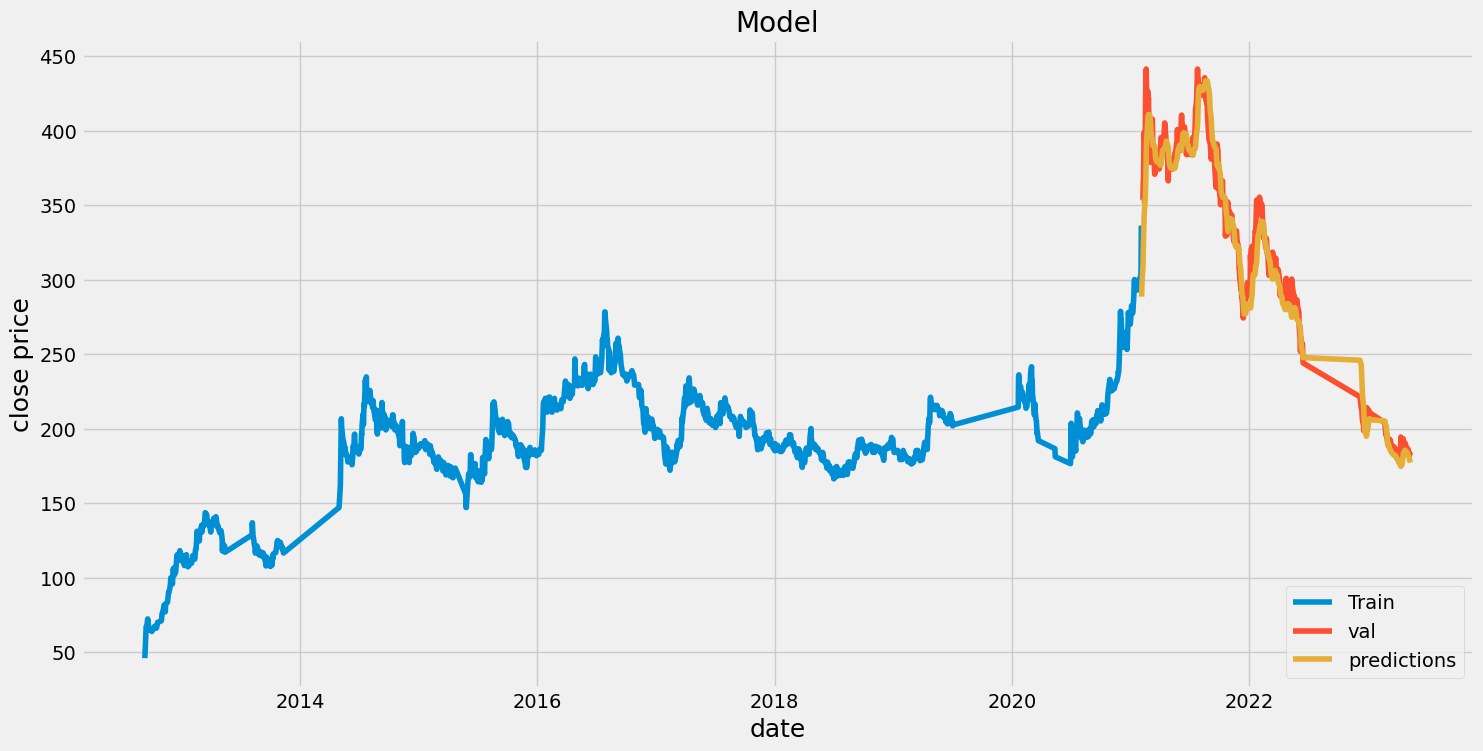

In [96]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions

#visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['c'])
plt.plot(valid[['c','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [97]:
valid

,c,predictions
t,,
2021-02-03 14:59:59,353.045013,288.599213
2021-02-04 14:59:59,353.045013,297.323425
2021-02-07 14:59:59,353.045013,308.580963
2021-02-08 14:59:59,365.401589,319.433563
2021-02-09 14:59:59,368.049426,328.877533
...,...,...
2023-05-07 14:59:40,183.000000,181.075150
2023-05-08 14:59:40,181.500000,180.066284
2023-05-09 14:59:40,183.200000,179.046646


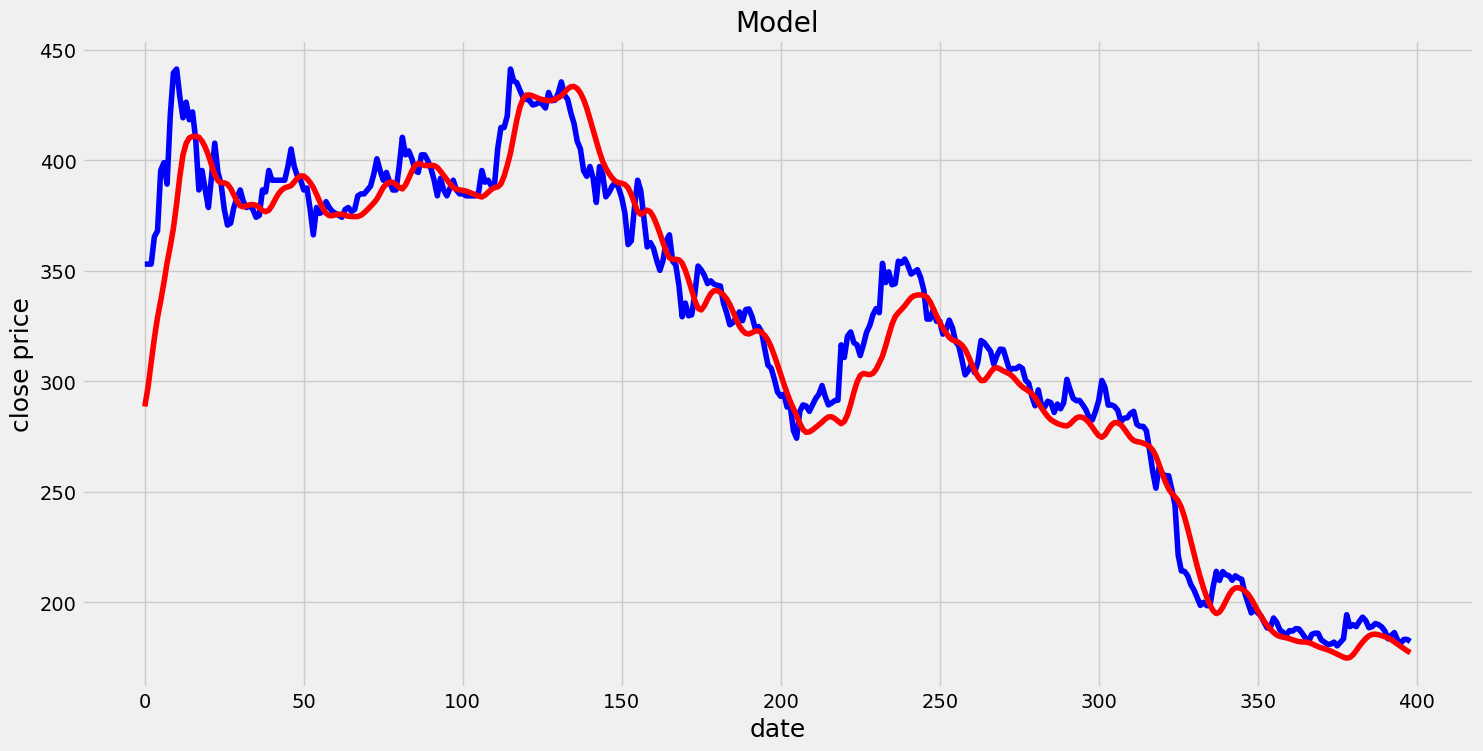

In [98]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(y_test,'b', label='Original Price')
plt.plot(predictions,'r', label='Predicted Price')
# plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [99]:
model.save('gbime_model.h5')